In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.linear_model as skl_lm

In [ ]:
# (a) Data Preprocessing and Cleaning

# 1. Load the data
df = pd.read_csv('/content/AIB503_GBA Data_Jan 25.csv')

In [ ]:
# 2. Examine the data structure
print("Data Head:")
print(df.head())

Data Head:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
# 3. Check for missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())


Missing Values by Column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


No missing values found.

In [ ]:
# 4. Creating dummy variables for categorical features.
# Create dummy variables for the categorical predictors:
# season, mnth, holiday, weekday, workingday, and weathersit.
categorical_vars = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# Drop the first category for each to avoid multicollinearity (dummy variable trap)
df_dummies = pd.get_dummies(df[categorical_vars], drop_first=True)

print("\nDummy variables:")
print(df_dummies.columns)


Dummy variables:
Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], dtype='object')


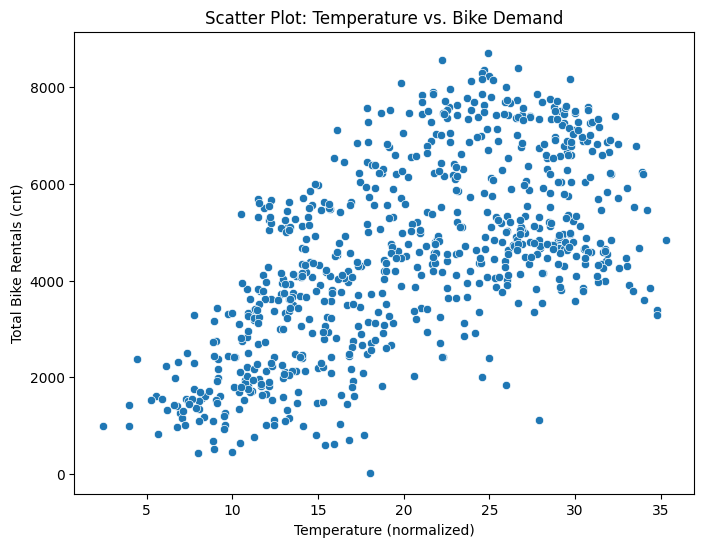

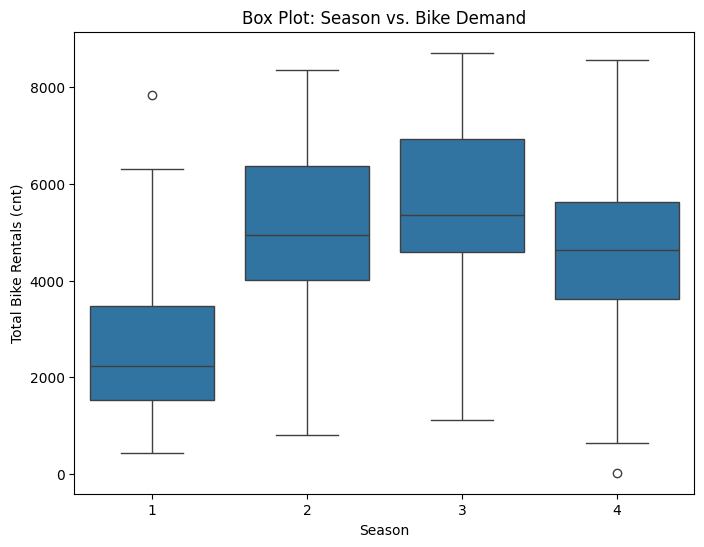

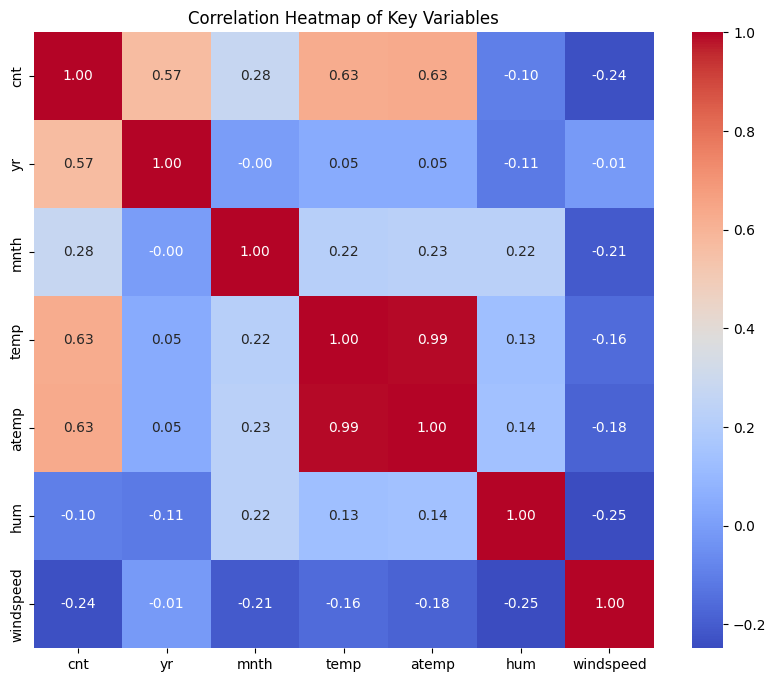

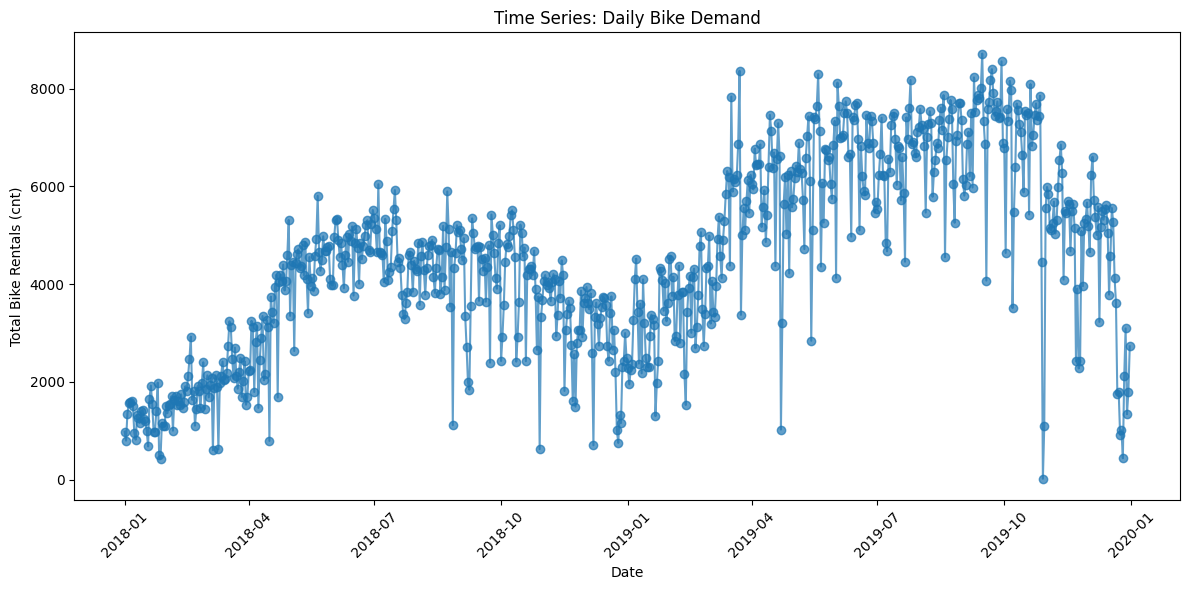

In [ ]:
# (b) Exploratory Data Analysis

# 1. Scatter Plot: Temperature vs. Total Bike Rentals (cnt)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Scatter Plot: Temperature vs. Bike Demand')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Total Bike Rentals (cnt)')
plt.show()

# 2. Box Plot: Season vs. Total Bike Rentals (cnt)
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Box Plot: Season vs. Bike Demand')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals (cnt)')
plt.show()

# 3. Heatmap: Correlation Matrix of the Key Numeric Variables
plt.figure(figsize=(10, 8))
corr = df[['cnt', 'yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Variables')
plt.show()

# 4. Plot the demand over time using a line plot:
plt.figure(figsize=(12, 6))
# Convert date column (dteday) to datetime using the correct format: day-month-year.
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df_sorted = df.sort_values('dteday')
plt.plot(df_sorted['dteday'], df_sorted['cnt'], marker='o', linestyle='-', alpha=0.7)
plt.title('Time Series: Daily Bike Demand')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals (cnt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# (c) Regression Model Implementation

# Prepare the response variable and predictors
# Response variable: cnt
# Predictors (X): season, yr, mnth, holiday, weekday, workingday, weathersit,
# temp, atemp, hum, and windspeed.
# Already created dummy variables in df_dummies for the categorical features.

# Combine numeric and dummy predictors:
X_numeric = df[['yr', 'temp', 'atemp', 'hum', 'windspeed']]
X = pd.concat([X_numeric, df_dummies], axis=1)
# print(X.columns)

# Define the response variable:
y = df['cnt']

### Scikit-learn ###
# Create the linear regression model using scikit-learn
reg_skl = skl_lm.LinearRegression()
# Fit the model to the predictors and response
reg_skl.fit(X, y)

# Predict bike demand for a new observation (using the first row as an example)
y_pred_sample = reg_skl.predict(X.iloc[[0]])
print("\nScikit-learn Prediction for the first observation:", y_pred_sample)

### Statsmodel ###
# Add a constant for the intercept (for statsmodels)
X_sm = sm.add_constant(X)

# Regression using statsmodels (for comparison)
model_sm = sm.OLS(y, X_sm).fit()
# Summary includes intercept, coefficients, standard errors, t-statistics,
# p-values, and the overall R-squared value
print("\nStatsmodels OLS Regression Summary:")
print(model_sm.summary())


# print("Prediction for all observations:", reg_skl.predict(X))


Prediction for the first observation: [1910.48601657]

Statsmodels OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     262.8
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          4.25e-243
Time:                        07:50:48   Log-Likelihood:                -5970.9
No. Observations:                 730   AIC:                         1.197e+04
Df Residuals:                     718   BIC:                         1.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

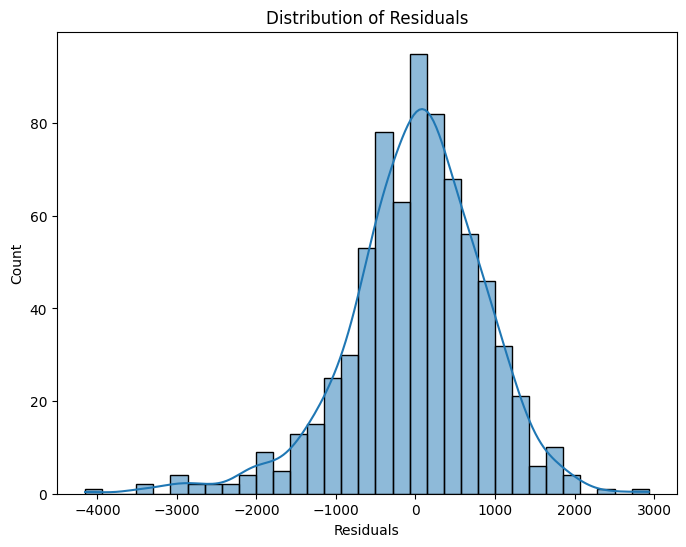

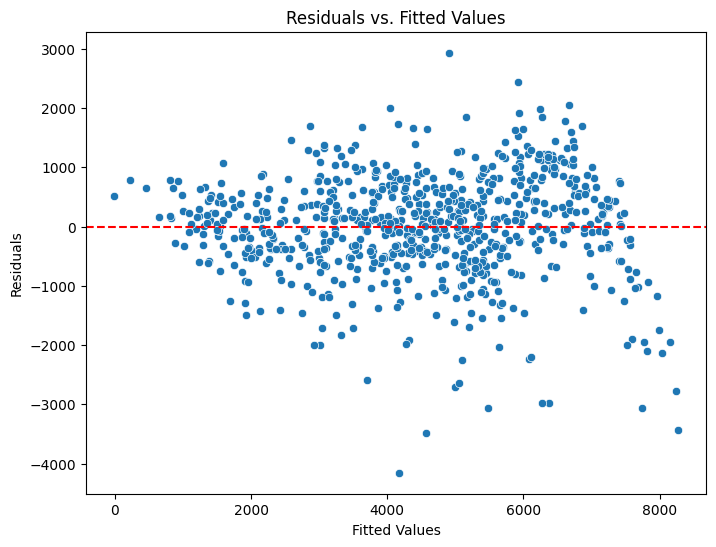

In [ ]:
# (d) Model Evaluation and Interpretation

# Plotting the residuals to check for homoscedasticity and normality.
residuals = model_sm.resid

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=model_sm.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()